# Supervised Learning_Project Assignment

# Objective = To predict the likelihood of a liability customer buying personal loans.

# Importing the relevant Libraries

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.utils import shuffle
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import pylab as pl
random_state = np.random.RandomState(1)
from scipy import interp

# Exploratory Data Analysis

# # Study the data distribution in each attribute

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
data.shape

(5000, 14)

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The dataset of Bank_Personal_Loan_Modelling.csv has been provided. The data has some redundant data attributes like "ID" which can be dropped as the value of ID increase for each row and therefore is of no use to create a classification model.
The dataset contains in all 5000 rows and 14 columns.

# # Checking for missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data info shows that no columns have Missing values.
Except the CCAvg column all columns have numeric integer vlaues. CCAvg has float values. The Categorical variables like Mortgage, Securitires Account, CD Account, CreditCard, including the traget varaiable Personal loan have data type as integer. Target variable will need to be treated as Category.

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Univariate Analysis of Demography information.
1) Age: - The Average age of Thera Bank customers is 45.33 years and it deviates by 11.46%. The Minimum age is 23 years and Maximum age is 67 years. It is not a normal distribution.
2) Experience: - The experience variable has some outlier values. The minimum experience is a negative value which has to be handlled by replacing it with either the median experience or by LOCF or by just dropping the value.
3) Income: - The average income for Thera Bank Customers is 73.77K and it deviates by 46% wihich indicates huge variation in the salaries and has outliers. It would make sense to cap the income after some bivaraiate/multivariate analysis. Also it's corelation to the bank products needs to be studied.
4)ZIP Code: - Seems to be a temporal variable and could be used for goruping by regoins if it could be transformed to area names
5) Family: - The size of the family corelated to the income and CCAvg, Education, Mortgage and Personal Loan.

In [7]:
data.groupby(["Personal Loan"]).count()
#The class distribution is almost 9.4:1 for 0 and 1 as is also mentioned as the conversion rate.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


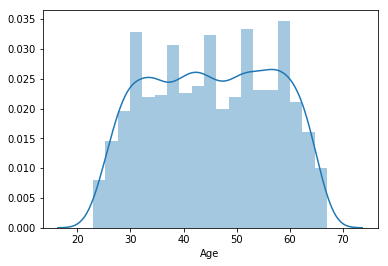

In [8]:
sns.distplot(data ['Age'])

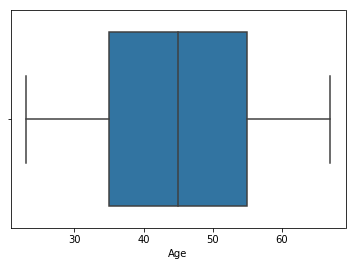

In [9]:
sns.boxplot(data.Age)

The Age variable does not show normal distribution. There are no outliers in Age variable. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


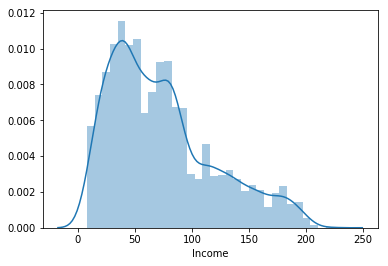

In [10]:
sns.distplot(data['Income'])

Income variable is not normally distributed.

[0.53822878 0.8641094  1.36379301 ... 1.08136314 0.53822878 0.20043396]
(array([3896, 4993], dtype=int64),)


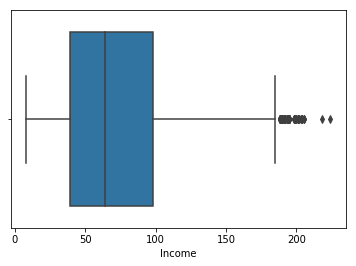

In [11]:
sns.boxplot(data['Income'], orient= "h")
from scipy import stats 
outliers = np.abs(stats.zscore(data['Income']))
print(outliers)
threshold = 3.0
print(np.where(outliers>3.0))

In [12]:
print(outliers[3896,])
print(data.Income[3896])
print(outliers[4993,])
print(data.Income[4993])

3.2637117837190517
224
3.1333595359539257
218


Income variable has some outliers as shown by the box plot. Using Z scores to identify outliers, it is observed that there are 2 salaries $224K and $218K which have a Z score of more than 3.

In [13]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
data.rename(columns = {'Personal Loan' : 'Personal_Loan','Securities Account':'Securities_Account','CD Account':'CD_Account'}, inplace = True)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Univariate Analysis of Customer Relationship information

Mortgage Account: The mean Mortgage is USD 50.56K, 50 percent customers do not have any mortgage. The maximum mortgage is $635K.
Securities Account and CD account : Less than 25 percent customers have a security deposit and CD accounts.
Online account: - Around 30% of the customers have online account.
Credit Card of Universal Bank: - ~29 percent of the customers have Universal Bank credit card.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

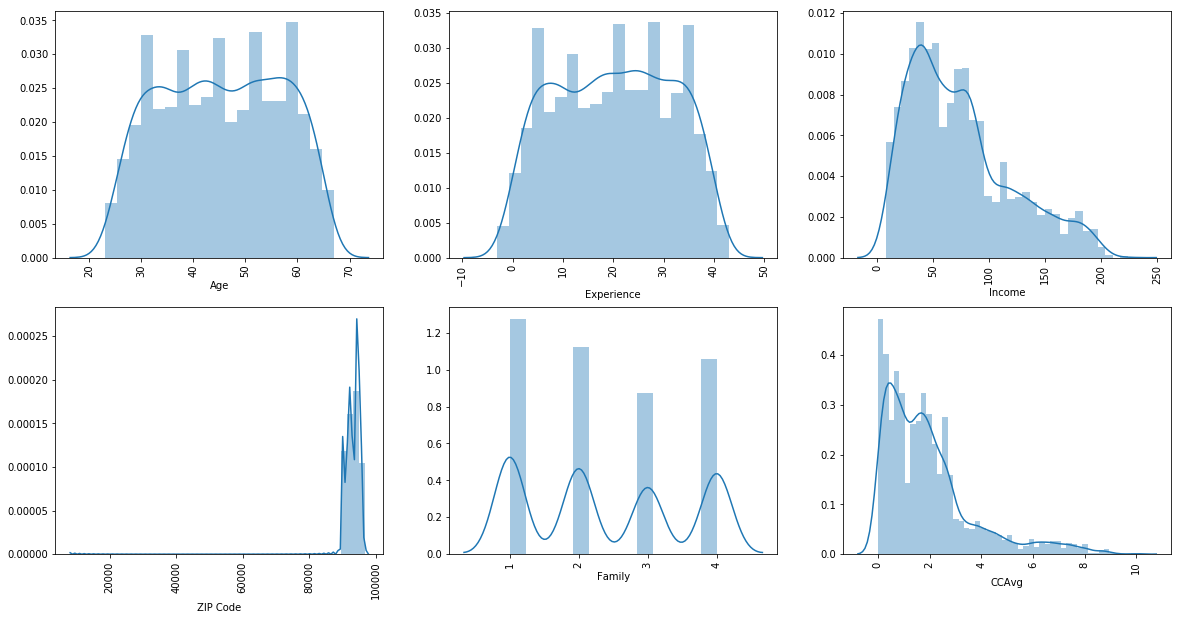

In [15]:
Numerical = ['Age','Experience','Income','ZIP Code','Family','CCAvg']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(Numerical, ax.flatten()):
    sns.distplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

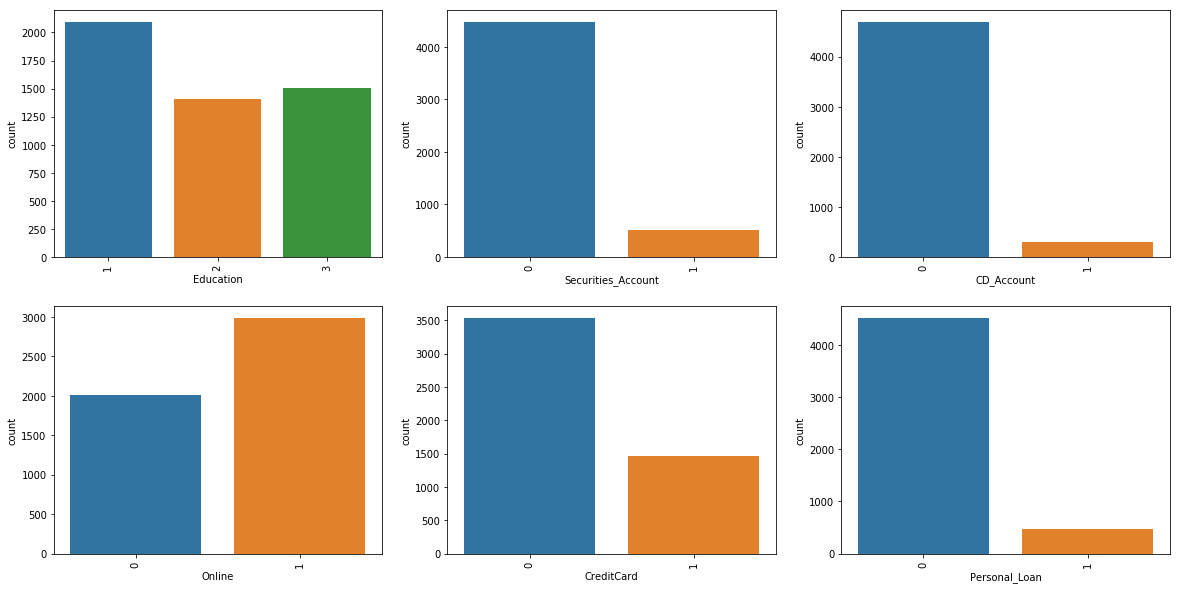

In [16]:
Categorical = ['Education','Securities_Account','CD_Account','Online','CreditCard', 'Personal_Loan']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(Categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

None of the numerical variables follow a normal distribution. The numerical varaibles will need to be transformed to make the distribution more normalized. 

# Multivariate analysis

In [17]:
data = data.drop(['ID'], axis =1)

In [18]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Target Column Distribution 

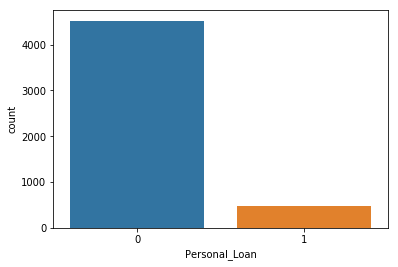

In [19]:
sns.countplot(x='Personal_Loan', data = data)

Further Ananlysis of the Target variable with the demographic data and account type information

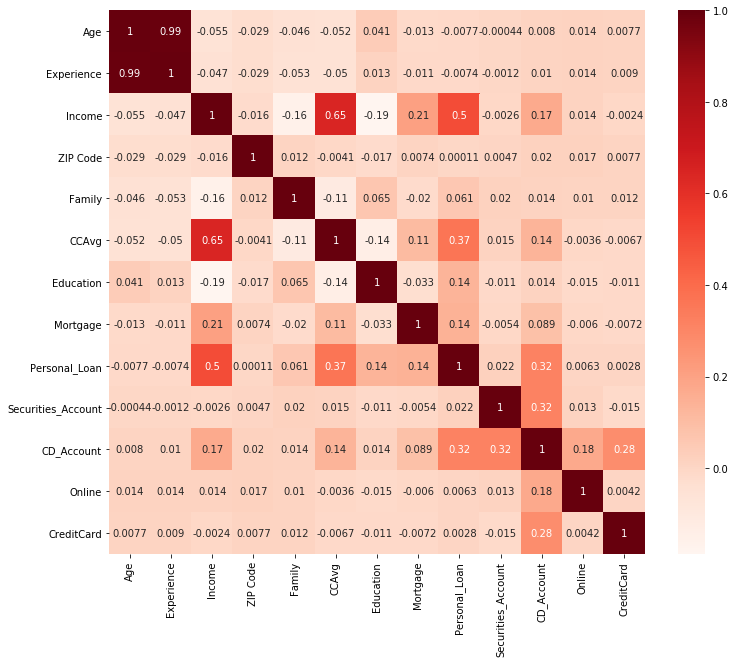

In [20]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Income and Personal Loan acceptance is most correlated.

# Analysing the most correlated dependant variable.

# Plot Histogram of Income

(array([129.,  96., 152., 295., 130., 227., 202., 318., 224., 182., 217.,
        108., 270.,  95., 177., 136., 253., 263.,  98., 129.,  53.,  92.,
         40.,  75., 117.,  54.,  74.,  47.,  94.,  38.,  77.,  54.,  42.,
         51.,  44.,  47.,  24.,  47.,  34.,  45.,  54.,  12.,  36.,  26.,
         13.,   7.,   0.,   0.,   1.,   1.]),
 array([  8.  ,  12.32,  16.64,  20.96,  25.28,  29.6 ,  33.92,  38.24,
         42.56,  46.88,  51.2 ,  55.52,  59.84,  64.16,  68.48,  72.8 ,
         77.12,  81.44,  85.76,  90.08,  94.4 ,  98.72, 103.04, 107.36,
        111.68, 116.  , 120.32, 124.64, 128.96, 133.28, 137.6 , 141.92,
        146.24, 150.56, 154.88, 159.2 , 163.52, 167.84, 172.16, 176.48,
        180.8 , 185.12, 189.44, 193.76, 198.08, 202.4 , 206.72, 211.04,
        215.36, 219.68, 224.  ]),
 <a list of 50 Patch objects>)

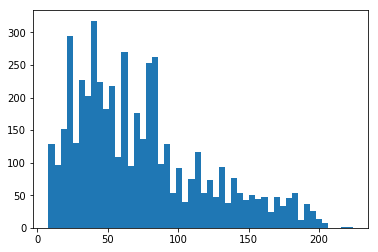

In [21]:
plt.hist(data['Income'], 50)

In [22]:
amountIntervalsPoints = np.array([0, 50, 100,150,200, 250, 500, 750, 1000])
amountIntervals = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in np.arange(len(amountIntervalsPoints) - 1)]
amountIntervals

[(0, 50),
 (51, 100),
 (101, 150),
 (151, 200),
 (201, 250),
 (251, 500),
 (501, 750),
 (751, 1000)]

In [23]:
amountIntervalsDf = pd.DataFrame(amountIntervals, columns = ['intervalLeftSide', 'intervalRightSide'])
amountIntervalsDf

,intervalLeftSide,intervalRightSide
0,0,50
1,51,100
2,101,150
3,151,200
4,201,250
5,251,500
6,501,750
7,751,1000


In [24]:
#Personal Loan Accpetance table preparation
PLAcceptance0 = []
PLAcceptance1 = []
for interval in amountIntervals:
    subData = data[data.Income >= interval[0]]
    subData = subData[subData.Income <= interval[1]]
    PLAcceptance0.append(sum(subData.Personal_Loan == 0))
    PLAcceptance1.append(sum(subData.Personal_Loan == 1))

   # Creating Personal Loan Accpetance data frame

In [25]:
#tempDf = pd.DataFrame(np.column_stack([Credibility0, Credibility1]), columns = ['Credibiliity0', 'Credibiliity1'])
#tempDf
tempDf = pd.DataFrame(np.column_stack([PLAcceptance0, PLAcceptance1]), columns = ['PLAcceptance0', 'PLAcceptance1'])
tempDf

,PLAcceptance0,PLAcceptance1
0,1914,0
1,1832,42
2,550,220
3,211,215
4,13,3
5,0,0
6,0,0
7,0,0


# Concatenate the above 2 dataframes and give the total of PLAcceptance0 and PLAcceptance1

In [26]:
comparePLAcceptance = pd.concat([amountIntervalsDf.reset_index(drop=True), tempDf], axis=1)
comparePLAcceptance
comparePLAcceptance['total'] = comparePLAcceptance.PLAcceptance0 + comparePLAcceptance.PLAcceptance1
comparePLAcceptance

,intervalLeftSide,intervalRightSide,PLAcceptance0,PLAcceptance1,total
0,0,50,1914,0,1914
1,51,100,1832,42,1874
2,101,150,550,220,770
3,151,200,211,215,426
4,201,250,13,3,16
5,251,500,0,0,0
6,501,750,0,0,0
7,751,1000,0,0,0


# Plot Personal Loan Acceptance plot for PLAcceptance == 0 and also ==1

Text(0.5,1,'Personal Loan Accpetance plot for Personal Loan Accpetance == 0')

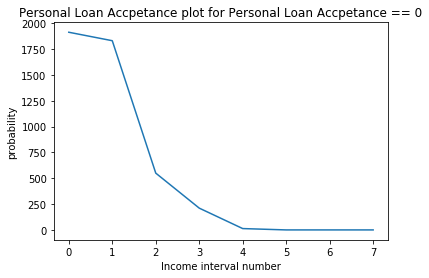

In [27]:
plt.plot(comparePLAcceptance.PLAcceptance0)
plt.xlabel('Income interval number')
plt.ylabel('probability')
plt.title("Personal Loan Accpetance plot for Personal Loan Accpetance == 0")

Text(0.5,1,'Personal Loan Accpetance plot for Personal Loan Accpetance == 1')

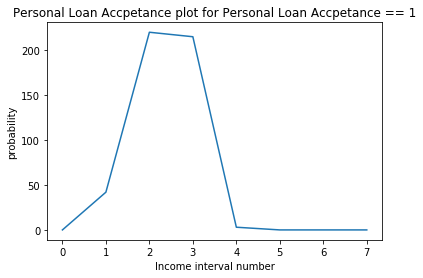

In [28]:
plt.plot(comparePLAcceptance.PLAcceptance1)
plt.xlabel('Income interval number')
plt.ylabel('probability')
plt.title("Personal Loan Accpetance plot for Personal Loan Accpetance == 1")

# Prepare input data for the model

In [29]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = np.array(data.Income)
y = data["Personal_Loan"]

In [30]:
len(X),len(y)

(5000, 5000)

# Split Data into Training and Test set

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1)

# Fitting Logistic Regression Model and Noting its performance

In [32]:
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.198376
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.366      
Dependent Variable: Personal_Loan    AIC:              1392.6349  
Date:               2020-02-15 21:59 BIC:              1404.9559  
No. Observations:   3500             Log-Likelihood:   -694.32    
Df Model:           1                LL-Null:          -1095.5    
Df Residuals:       3498             LLR p-value:      1.7177e-176
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -6.1422     0.2231   -27.5280   0.0000   -6.5795   -5.7049
x1         0.0370     0.0016    22.5258   0.0000    0.0338    0.0402
==================================================================

"""

# Test Accuracy Calculation

In [33]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

X_test[0:5]

array([ 84,  45,  35, 114,  70], dtype=int64)

In [34]:
y_pred_df = get_predictions(X_test, lg )
y_pred_df['OriginalPersonal_Loan'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted_prob,OriginalPersonal_Loan
0,84,0.045941,0
1,45,0.011242,0
2,35,0.007792,0
3,114,0.127519,0
4,70,0.027881,0


In [35]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted_prob,OriginalPersonal_Loan,predicted
0,84,0.045941,0,0
1,45,0.011242,0,0
2,35,0.007792,0,0
3,114,0.127519,0,0
4,70,0.027881,0,0
5,20,0.004487,0,0
6,55,0.016196,0,0
7,98,0.074797,0,0
8,112,0.119508,0,0
9,98,0.074797,0,0


# Building a confusion Matrix

In [36]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Accepted", "Not Accepted"] , yticklabels = ["Accepted", "Not Accepted"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

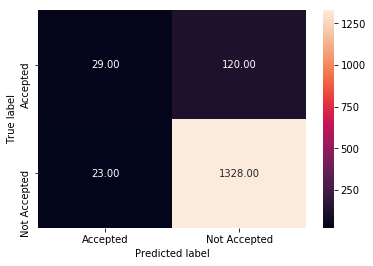

In [37]:
draw_cm( y_pred_df.OriginalPersonal_Loan, y_pred_df.predicted )

In [38]:
print( 'Total Accuracy : ',( metrics.accuracy_score( y_test, y_pred_df.predicted)))

Total Accuracy :  0.9046666666666666


# 10. Predicted Probability distribution Plots for Defaults and Non Defaults

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


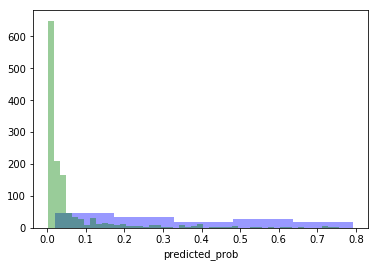

In [39]:
sns.distplot( y_pred_df[y_pred_df.OriginalPersonal_Loan == 1]["predicted_prob"], kde=False, color = 'b' )
sns.distplot( y_pred_df[y_pred_df.OriginalPersonal_Loan == 0]["predicted_prob"], kde=False, color = 'g' )

# Build KNN algorithm 

# Importing Relevant Libraries

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [41]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = data.drop(labels= "Personal_Loan" , axis = 1)
y = data["Personal_Loan"]
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [42]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [43]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [44]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(XScaled.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(y.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Build kNN Model

In [45]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [46]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

# Evaluate Performance of kNN Model

In [47]:
'''# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
be assigned to the test data point'''

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9486666666666667

Confusion Matrix


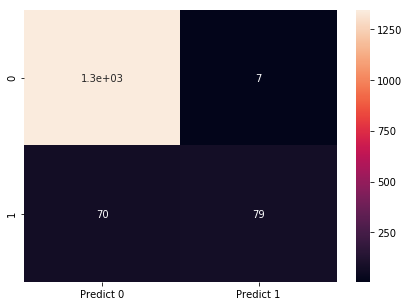

In [48]:
# calculate accuracy measures and confusion matrix
# from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The prediction metric of KNN model is >94% as compared to Logistic Regression Model which is 86%. KNN Model is better than Logistic Regression Model.

# K-Nearest Neighbour with Hyper Parameter Tuning using GridSearchCV. Using Grid Search to identify optimum value for K.

n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
parameters = {
                'n_neighbors': [3,5,7,9],
                'leaf_size': [10,20,30],
                'metric': ['minkowski']
}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv=3)
clf.fit(X_train, y_train)
# View The Best Parameters
print('Best Parameters:')
(clf.best_estimator_.get_params())
test_pred = clf.predict(X_test)
#accuracy_score(y_test, test_pred)

Best Parameters:


# Build Naive Bayes Classifier on training Dataset

In [51]:
X_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,0.144966,0.165294,-0.842384,0.542739,-0.345432,-0.365061,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
4768,-0.640236,-0.532371,-0.755483,-0.016262,-1.216855,0.035515,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
65,1.191902,1.299002,1.243252,-0.844867,-1.216855,1.065567,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632
177,-1.425438,-1.491662,-0.190623,0.461670,1.397414,-0.078935,0.141703,1.843604,-0.341423,-0.25354,-1.216618,-0.645314
4489,-0.552992,-0.619580,-1.146539,1.114938,0.525991,-0.994537,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314


# Train Naive Bayes algorithm

In [52]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
PLAcceptance_model = GaussianNB()

PLAcceptance_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

Performance of our model with training data

In [53]:
PLAcceptance_predict = PLAcceptance_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, PLAcceptance_predict)))
print()

Model Accuracy: 0.8900



Confusion Matrix


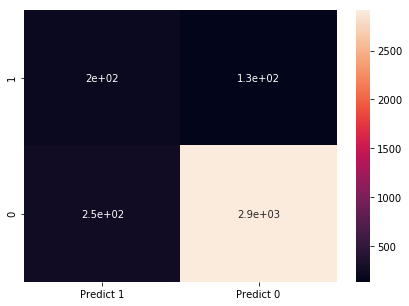

In [54]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_train, PLAcceptance_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [55]:
print("Classification Report")
print(metrics.classification_report(y_train, PLAcceptance_predict, labels=[1, 0]))

Classification Report
             precision    recall  f1-score   support

          1       0.44      0.60      0.51       331
          0       0.96      0.92      0.94      3169

avg / total       0.91      0.89      0.90      3500



The Precision is 44% for the training set. This indicates that out of all the customers predicated to accept the offer only 44% were correctly identified by this model. The true positive reate is low. 

The recall is 60% for the training set. It indicates that only 60% True Positives were Identifed in the Training set. Whihc means that only on 60% of the observations it was accurately predicted that the customer would accept the loan offer. 

F1 measure is based on the precision and recall values and conveys the balance between precision and recall. In this case the F1 Score of 51% indicates a god balance between recall and precision.

# Model Evaluation Logistic Regression, KNN and Navie Bayes

In [56]:
filename = 'Bank_Personal_Loan_Modelling.csv'
names = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage','Securities Account', 'CD Account','Online', 'CreditCard','Personal Loan']
dataframe = read_csv(filename, header = 1, names=names)
array = dataframe.values
X = array[:,0:12]
Y = array[:,13]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)
classifier1 = LogisticRegression()
classifier2 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
classifier3 = GaussianNB()
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)
probas3_= classifier3.fit(X_train, y_train).predict_proba(X_test)

In [58]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve for Logistic Regression : %f" % roc_auc1)

Area under the ROC curve for Logistic Regression : 0.505894


In [59]:
# Compute ROC curve and area the curve for KNN
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve for KNN : %f" % roc_auc2)

Area under the ROC curve for KNN : 0.489433


In [60]:
# Compute ROC curve and area the curve for Naive Bayes
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve for Naive Bayes : %f" % roc_auc3)

Area under the ROC curve for Naive Bayes : 0.602820


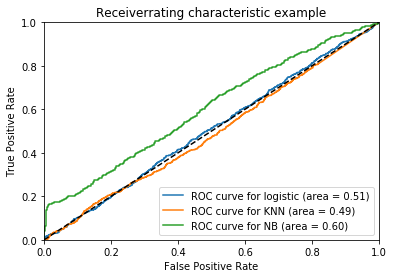

In [61]:
# Plot the ROC

# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for KNN (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for NB (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

The Logistic Regression model and the KNN model have AUC 0.51 and 0.49 which indicates that these/
models will not be able to discriminate Personal Loan Offer accpetance or rejection. Naive Bayes Model has a AUC of 0.60 which indicates it is currently the best model with more ability to discriminate as comapred to the Logistic Regression and KNN models. 

In [62]:
i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),'tpr1' : pd.Series(tpr1, index = i), '1-fpr1' : pd.Series(1-fpr1, index = i), 'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 'thresholds1' : pd.Series(thresholds1, index = i)})
print(roc1.loc[(roc1.tf1-0).abs().argsort()[:1]])

i = np.arange(len(tpr2)) # index for df
roc2 = pd.DataFrame({'fpr2' : pd.Series(fpr2, index=i),'tpr2' : pd.Series(tpr2, index = i), '1-fpr2' : pd.Series(1-fpr2, index = i), 'tf2' : pd.Series(tpr2 - (1-fpr2), index = i), 'thresholds2' : pd.Series(thresholds2, index = i)})
print(roc2.loc[(roc2.tf2-0).abs().argsort()[:1]])

i = np.arange(len(tpr3)) # index for df
roc3 = pd.DataFrame({'fpr3' : pd.Series(fpr3, index=i),'tpr3' : pd.Series(tpr3, index = i), '1-fpr3' : pd.Series(1-fpr3, index = i), 'tf3' : pd.Series(tpr3 - (1-fpr3), index = i), 'thresholds3' : pd.Series(thresholds3, index = i)})
print(roc3.loc[(roc3.tf3-0).abs().argsort()[:1]])

         fpr1      tpr1    1-fpr1       tf1  thresholds1
525  0.492869  0.506024  0.507131 -0.001107      0.28954
         fpr2      tpr2    1-fpr2       tf2  thresholds2
531  0.516258  0.483266  0.483742 -0.000476     0.233488
         fpr3      tpr3    1-fpr3       tf3  thresholds3
454  0.442099  0.559572  0.557901  0.001671     0.133709


In [63]:
roc1.head()

,fpr1,tpr1,1-fpr1,tf1,thresholds1
0,0.000000,0.001339,1.000000,-0.998661,0.477821
1,0.000000,0.004016,1.000000,-0.995984,0.300793
2,0.001141,0.004016,0.998859,-0.994843,0.300544
3,0.001141,0.009371,0.998859,-0.989488,0.300322
4,0.002282,0.009371,0.997718,-0.988347,0.300255


In [64]:
roc2.head()

,fpr2,tpr2,1-fpr2,tf2,thresholds2
0,0.000000,0.000000,1.000000,-1.000000,2.000000
1,0.003993,0.000000,0.996007,-0.996007,1.000000
2,0.003993,0.001339,0.996007,-0.994668,0.880658
3,0.006845,0.001339,0.993155,-0.991816,0.856661
4,0.006845,0.002677,0.993155,-0.990477,0.855365


In [65]:
roc3.head()

,fpr3,tpr3,1-fpr3,tf3,thresholds3
0,0.000000,0.001339,1.000000,-0.998661,1.0
1,0.000000,0.033467,1.000000,-0.966533,1.0
2,0.000570,0.033467,0.999430,-0.965962,1.0
3,0.000570,0.037483,0.999430,-0.961946,1.0
4,0.001141,0.037483,0.998859,-0.961376,1.0


# Regularization Techniques

In [66]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.rename(columns = {'Personal Loan' : 'Personal_Loan','Securities Account':'Securities_Account','CD Account':'CD_Account'}, inplace = True)

In [67]:
X = data.drop(labels= "Personal_Loan" , axis = 1)
y = data["Personal_Loan"]
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [68]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-2.047251e-17,2.478018e-17,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.731704e+00,-1.948906e+00,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-8.658522e-01,-9.019702e-01,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,0.000000e+00,-2.952359e-02,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.658522e-01,8.429230e-01,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.731704e+00,1.889859e+00,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [69]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [70]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [71]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [72]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.944

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# Creating a Regularized Ridge Model

In [74]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-0.00371183 -0.07205065  0.07458488  0.12903225  0.00323443  0.03799832
  0.02972997  0.06341461  0.00881148 -0.02171889  0.07857449 -0.0122058
 -0.02067916]


# Creating a Regularized Lasso Model

In [75]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-0.         -0.         -0.          0.04789804  0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]


# Compare Scores

In [76]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.39196442287911903
0.37067960773315456


In [77]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.1388226409970662
0.13257304571129125


# Increasing the Dimensionality

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [80]:
X_poly = poly.fit_transform(XScaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(3500, 92)

In [81]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.         -0.00184084  0.02257996 -0.02271871  0.14390368 -0.00074027
  0.02858631  0.02086541  0.05526124 -0.00539015 -0.01983521  0.07103977
 -0.01640602 -0.02070504 -0.03881341  0.03306098 -0.0047102   0.00256949
 -0.00197166  0.00528324  0.00219537  0.00087805  0.00465195 -0.0020577
 -0.00343131  0.00033099 -0.00053128 -0.00462177  0.03649241 -0.03170638
 -0.089922   -0.13489141  0.09654432  0.02155872  0.03188783  0.06055111
  0.01411399  0.0008108  -0.03307881  0.03116074  0.09172473  0.132688
 -0.0904853  -0.02121551 -0.03118239 -0.05740047 -0.01319962  0.00478942
  0.03055708  0.03027049  0.07221461  0.01313468 -0.02011059  0.04158014
 -0.00618554 -0.0260852   0.00046182  0.00448764  0.00436998 -0.00101526
  0.00353649 -0.00894768  0.00018928 -0.00166647  0.02228181 -0.0253458
  0.00948606 -0.00670275  0.01081663 -0.00427697 -0.00126895  0.03878131
 -0.00562483  0.00800923 -0.01870709 -0.00705883  0.00594687 -0.0087704
 -0.00128224 -0.01342074 -0.0034866  -0.005

In [82]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.5976575312568347
0.5632039918917718


In [83]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.41573741e-01 -0.00000000e+00  1.88656923e-02  5.22783871e-03
  4.39154482e-02  0.00000000e+00 -0.00000000e+00  2.48316313e-02
 -0.00000000e+00 -1.46286653e-03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.60616303e-02  2.71629758e-02  6.63856577e-02  3.39796384e-03
 -0.00000000e+00  2.48263083e-02 -0.00000000e+00 -8.13821459e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000

In [84]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.555000181678226
0.5364876031245875


THe Ridge and Lasso Regularization improve the model performance. Expecially the LASSO Regulariztion which helps imporve model performance as much as RIDGE regularization but with less dimensions.